In [1]:
from WindPy import *

w.start()

w.isconnected()


Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


True

In [2]:
import datetime

enddate = (datetime.datetime.now() - timedelta(days=1)).strftime('%Y-%m-%d')

In [3]:
error, datas = w.wsd("0700.HK,HSI.HI", "pct_chg", "ED-1Y",enddate, 
                     "TradingCalendar=HKEX;Fill=Previous;PriceAdj=F", usedf=True)
assert error==0, 'WSD 未成功提取数据，ErrorCode={}，含义为{}'.format(error, datas.values)
datas

,0700.HK,HSI.HI
2019-04-08,1.117021,0.470432
2019-04-09,0.894266,0.267113
2019-04-10,1.355579,-0.125773
2019-04-11,0.668724,-0.929994
2019-04-12,0.613183,0.235628
...,...,...
2020-03-30,-1.516736,-1.316498
2020-03-31,0.955921,1.848405
2020-04-01,-1.525513,-2.193278
2020-04-02,1.442308,0.841513


In [4]:
datas.index = [i.strftime('%Y%m%d') for i in datas.index]
datas.columns = ['腾讯控股', '恒生指数']

In [5]:
ret_cum = datas.cumsum()
ret_cum

,腾讯控股,恒生指数
20190408,1.117021,0.470432
20190409,2.011287,0.737545
20190410,3.366866,0.611772
20190411,4.035590,-0.318222
20190412,4.648774,-0.082594
...,...,...
20200330,4.159578,-23.514946
20200331,5.115500,-21.666540
20200401,3.589987,-23.859819
20200402,5.032294,-23.018305


In [6]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.style.use('seaborn-white')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

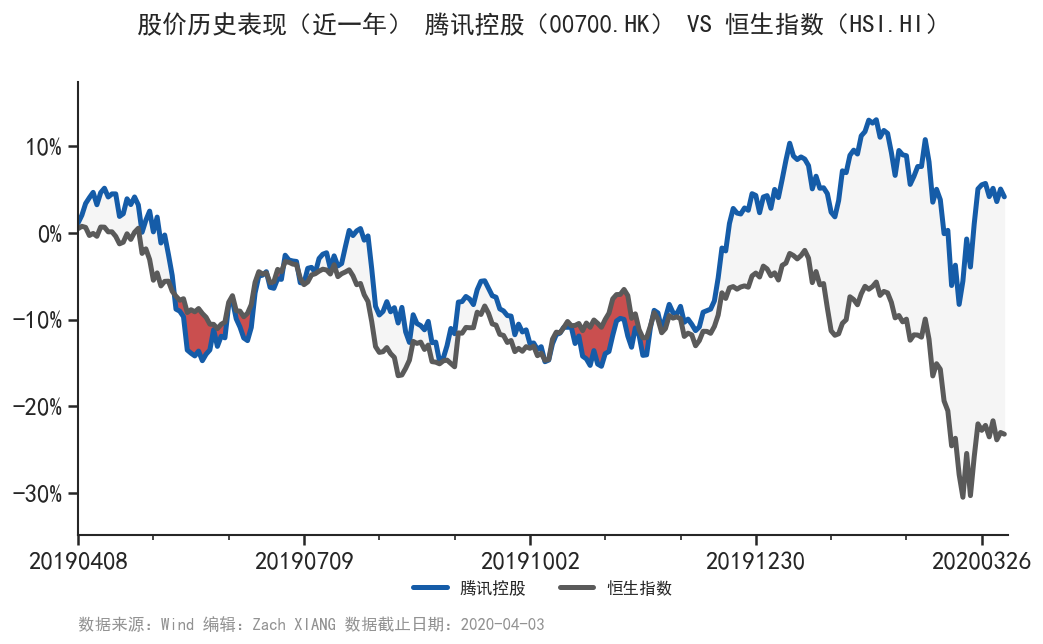

In [7]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=120)
ax.plot(ret_cum.index, ret_cum['腾讯控股'], color='#155ca8', lw =3.0, label='腾讯控股')
ax.plot(ret_cum.index, ret_cum['恒生指数'], color='#5a5a5a', lw =3.0, label='恒生指数')

ax.xaxis.set_major_locator(ticker.MultipleLocator(60))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(20))

ax.tick_params(axis='both', which='major', width=1.5,length=6, labelsize=15)
ax.tick_params(axis='x', which='minor', width=1.0,length=3)

ax.yaxis.set_major_formatter(ticker.PercentFormatter())

ax.set_xlim(left=0, right=len(ret_cum))

ymin, ymax = ret_cum.values.min(), ret_cum.values.max()
dy = (ymax - ymin) * 0.1
ax.set_ylim(ymin - dy, ymax + dy)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_title('股价历史表现（近一年） 腾讯控股（00700.HK） VS 恒生指数（HSI.HI）', loc='center', pad=30, fontsize=15)
ax.legend(fontsize = 10, loc='lower center', borderaxespad = -4.0, ncol = 2)

ax.text(0, -46, '数据来源：Wind 编辑：Zach XIANG 数据截止日期：2020-04-03', fontsize=10, alpha=0.5, ha='left', va='bottom')

y1 = ret_cum['腾讯控股']
y2 = ret_cum['恒生指数']
ax.fill_between(ret_cum.index, y1, y2, where=y1>y2, color='#f5f5f5')
ax.fill_between(ret_cum.index, y1, y2, where=y2>y1, color='#ca4f4f')

plt.savefig('股价历史表现（近一年） 腾讯控股（00700.HK） VS 恒生指数（HSI.HI）.png')
plt.show()